## Predictoo : Analysis of bank cheractarestic and time scrice prediction of SMS count 

### Projects contents 
    * Problem statements 
    * Data Collection 
    * EDA
    * Data pre processing 
    * Model Training 
    * Choose the best model 

In [4]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [5]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    # r2_square = r2_score(true, predicted)
    return mae, rmse, mse

In [6]:
config = { 
    'dir': r'data\Cleaned Basic daily.csv',
}

## Problem Statements 

## Data collection 

In [7]:
data = pd.read_csv(config['dir']) 
data = data.dropna()
data


,Unnamed: 0,company_name,dc_date,dc_daily_count
0,8732,Basic Bank Limited,2019-01-16,1
1,8733,Basic Bank Limited,2019-05-02,1
2,8734,Basic Bank Limited,2020-09-16,2
3,8735,Basic Bank Limited,2020-10-22,5
4,8736,Basic Bank Limited,2020-10-25,2
...,...,...,...,...
850,9582,Basic Bank Limited,2024-07-09,10791
851,9583,Basic Bank Limited,2024-07-10,13117
852,9584,Basic Bank Limited,2024-07-12,2050
853,9585,Basic Bank Limited,2024-07-13,2106


In [48]:
data.head()
print(data.columns) 
print(data.info()) 
print(len(data))

Index(['Unnamed: 0', 'company_name', 'dc_date', 'dc_daily_count'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      855 non-null    int64 
 1   company_name    855 non-null    object
 2   dc_date         855 non-null    object
 3   dc_daily_count  855 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 26.8+ KB
None
855


## Eda

In [49]:
print(f'total number of columns: {len(data.columns)}') 
print(f'total number of rows: {len(data)}') 
#datetime conversion 
data['dc_date'] = pd.to_datetime(data['dc_date'])
data = data.set_index('dc_date') 
data = data.sort_values(by='dc_date')
# data = data.reset_index()
#restting index
#drop company_name
data = data.drop('company_name', axis=1)
data = data.drop('Unnamed: 0', axis=1)



total number of columns: 4
total number of rows: 855


In [50]:
data.info()
print(f'index after reset: {data.index}')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 855 entries, 2019-01-16 to 2024-07-14
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   dc_daily_count  855 non-null    int64
dtypes: int64(1)
memory usage: 13.4 KB
index after reset: DatetimeIndex(['2019-01-16', '2019-05-02', '2020-09-16', '2020-10-22',
               '2020-10-25', '2020-10-27', '2021-01-10', '2021-01-14',
               '2021-02-04', '2021-02-15',
               ...
               '2024-07-01', '2024-07-04', '2024-07-05', '2024-07-06',
               '2024-07-08', '2024-07-09', '2024-07-10', '2024-07-12',
               '2024-07-13', '2024-07-14'],
              dtype='datetime64[ns]', name='dc_date', length=855, freq=None)


In [51]:
#max and min value 
print(data['dc_daily_count'].max())
print(data['dc_daily_count'].min())

15646
1


Text(0.5, 1.0, 'SMS count Over Time')

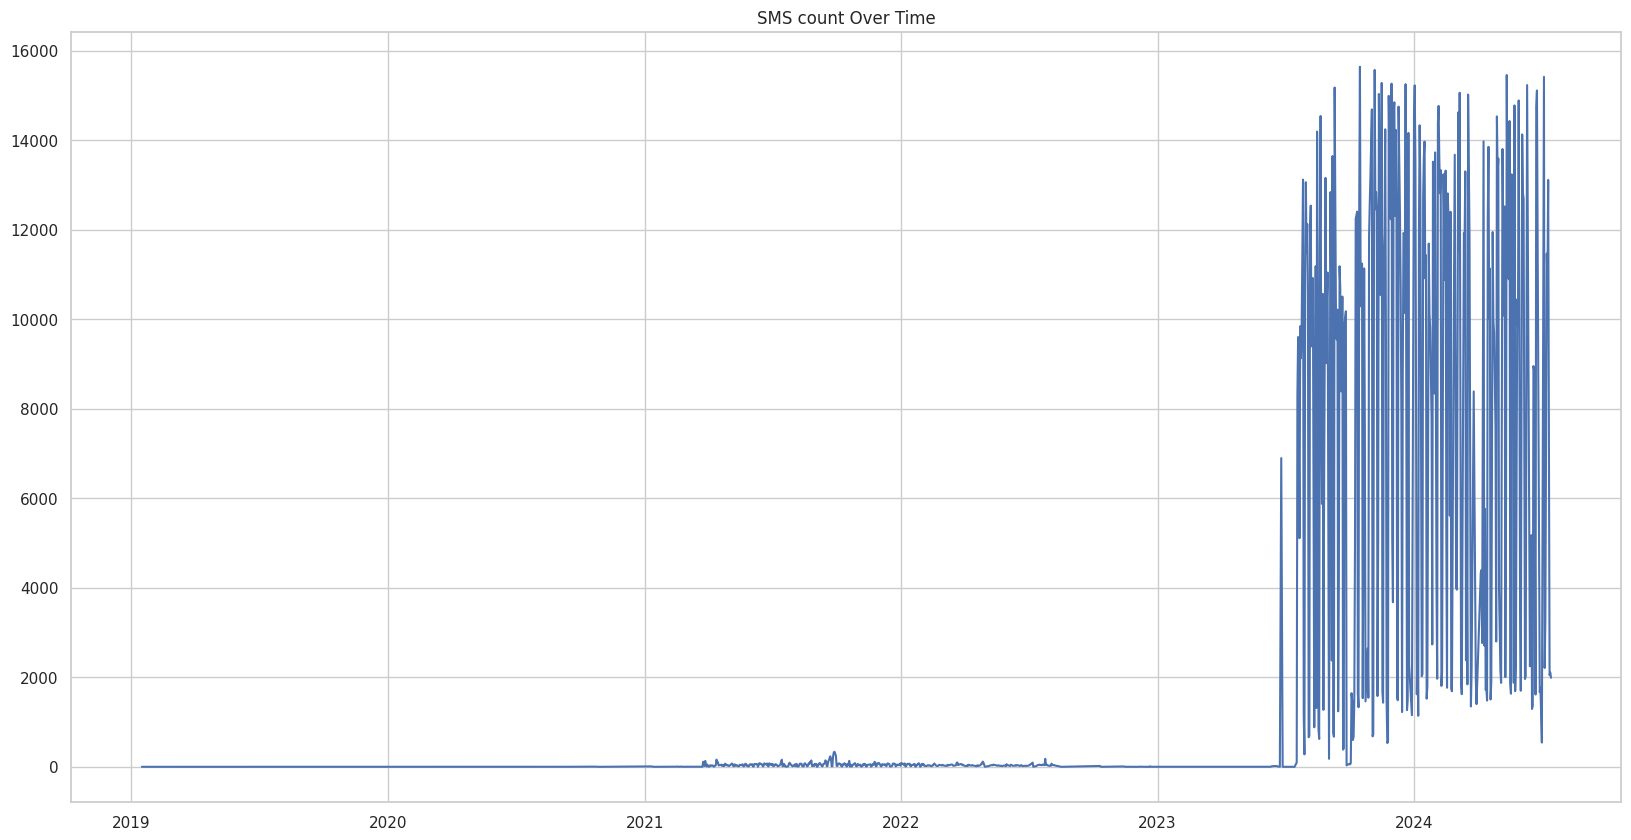

In [52]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 10))
plt.plot( data['dc_daily_count'])
plt.title('SMS count Over Time')

/tmp/ipykernel_70093/3358185533.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').sum()


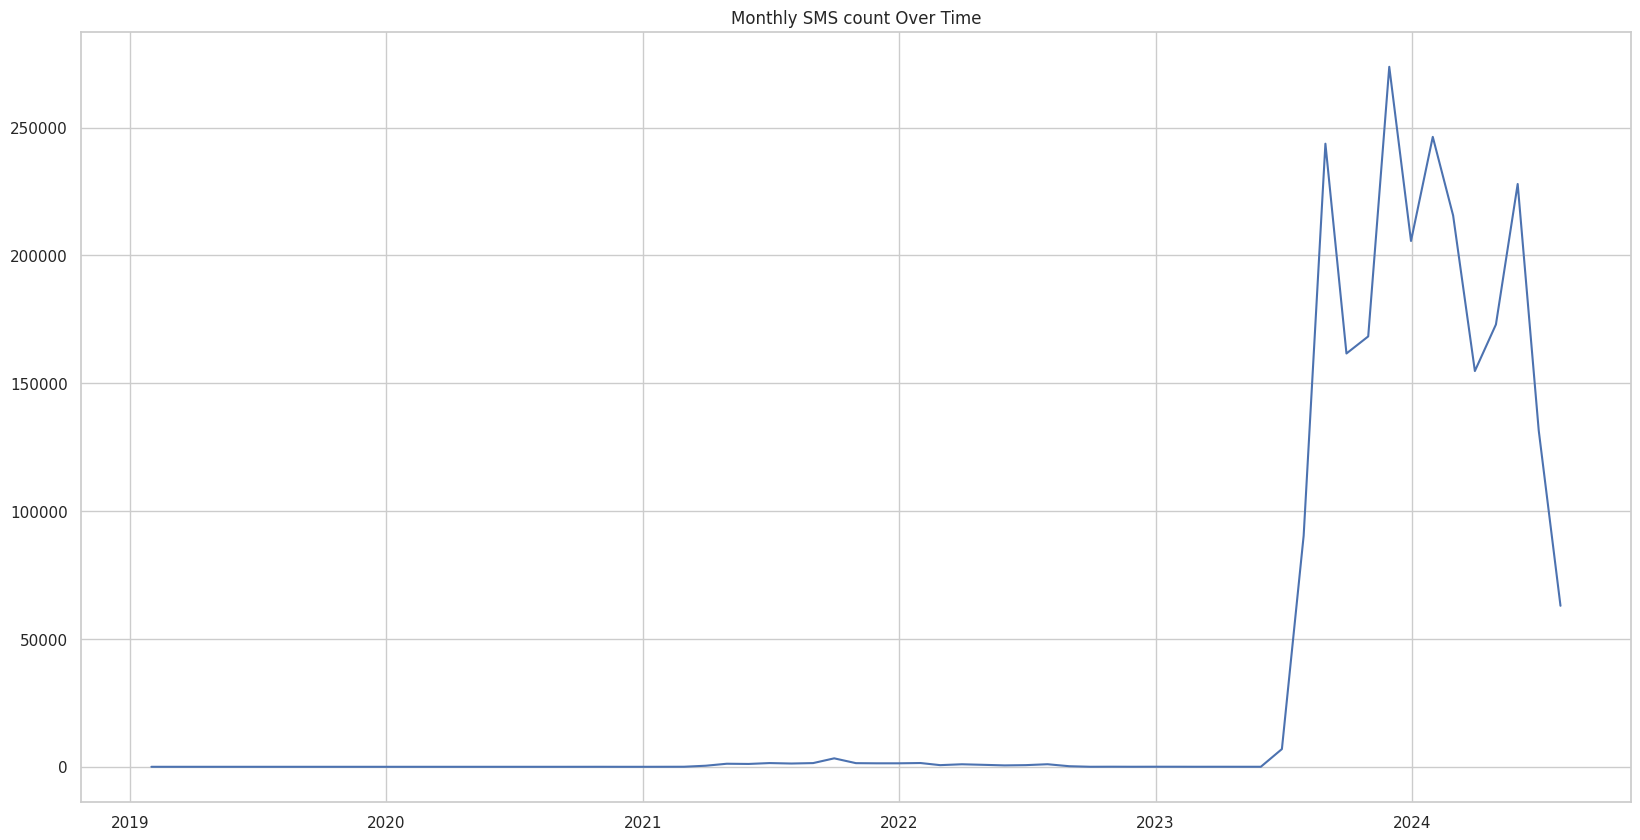

In [53]:
# Resample the data to monthly frequency, summing the weekly SMS counts
data_monthly = data.resample('M').sum()

# Plot the data
plt.figure(figsize=(20, 10))
plt.plot(data_monthly['dc_daily_count'])
plt.title('Monthly SMS count Over Time')
plt.show()


In [54]:
data_monthly = data.resample('M').sum()
data_monthly.head()

/tmp/ipykernel_70093/2213927144.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  data_monthly = data.resample('M').sum()


,dc_daily_count
dc_date,
2019-01-31,1
2019-02-28,0
2019-03-31,0
2019-04-30,0
2019-05-31,1


In [55]:
def add_mew_features(data):
    data= data.copy()
    data['month']=data.index.month 
    data['year']=data.index.year 
    data['day_of_week']=data.index.dayofweek
    
    return data 
                                

In [56]:

data = add_mew_features(data) 
data.head()

,dc_daily_count,month,year,day_of_week
dc_date,,,,
2019-01-16,1,1,2019,2
2019-05-02,1,5,2019,3
2020-09-16,2,9,2020,2
2020-10-22,5,10,2020,3
2020-10-25,2,10,2020,6


In [57]:
data.tail()

,dc_daily_count,month,year,day_of_week
dc_date,,,,
2024-07-09,10791,7,2024,1
2024-07-10,13117,7,2024,2
2024-07-12,2050,7,2024,4
2024-07-13,2106,7,2024,5
2024-07-14,1991,7,2024,6


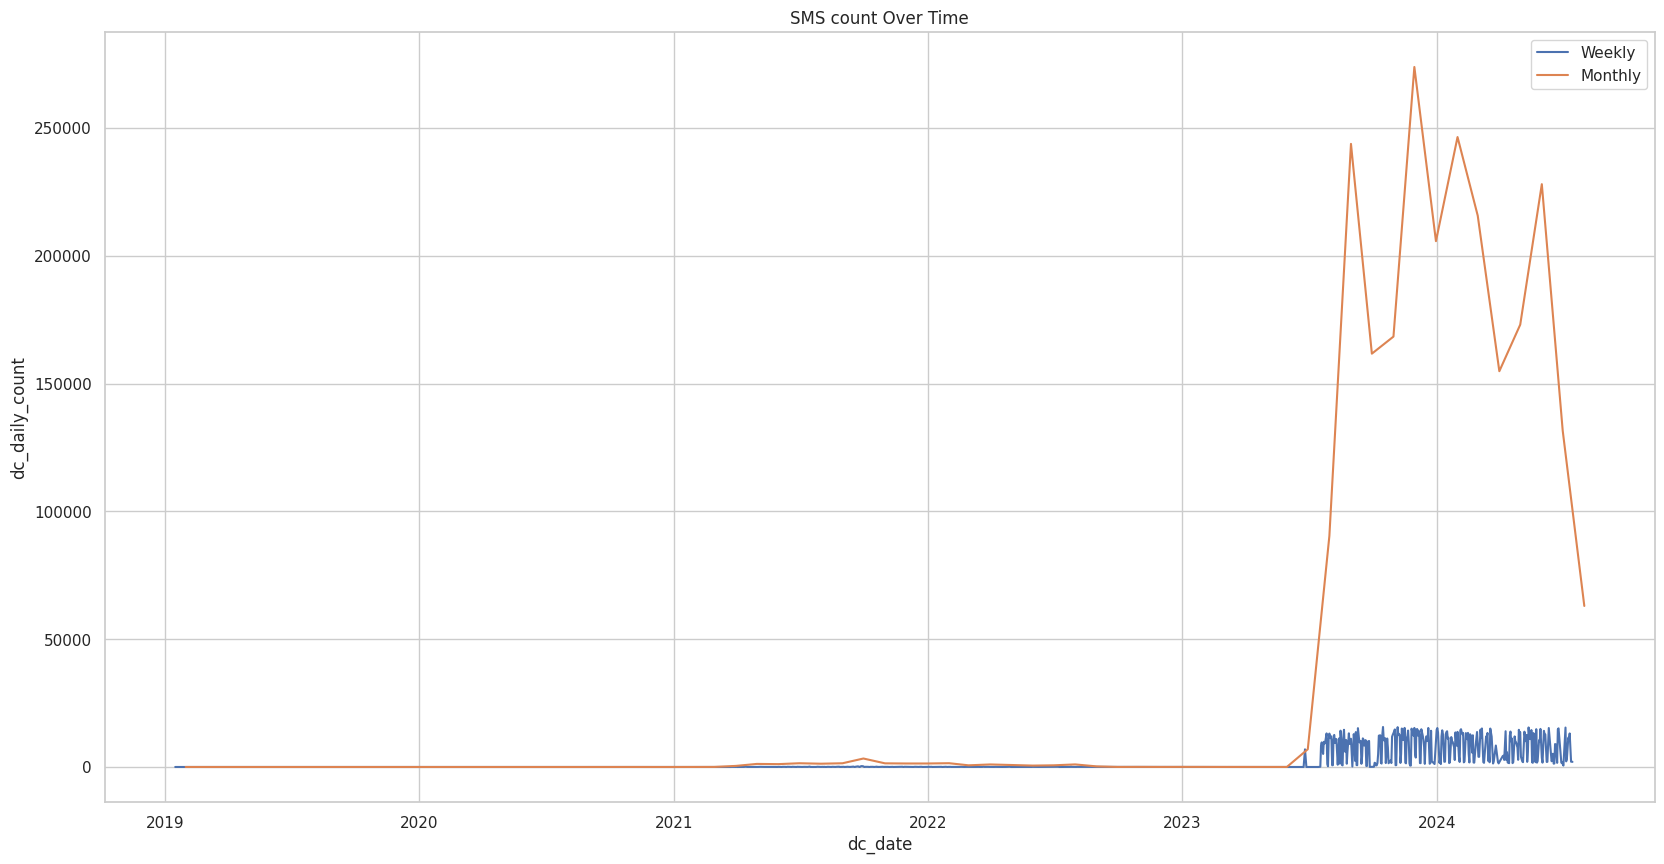

In [58]:
#plot weekly , MONTHLY, YEARLY 
plt.figure(figsize=(20, 10))
sns.lineplot(x=data.index, y=data['dc_daily_count'], label='Weekly')
sns.lineplot(x=data_monthly.index, y=data_monthly['dc_daily_count'], label='Monthly')
plt.title('SMS count Over Time')
plt.show()


/tmp/ipykernel_70093/2713437480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['dc_daily_count'])


Text(0.5, 1.0, 'SMS Count Distribution')

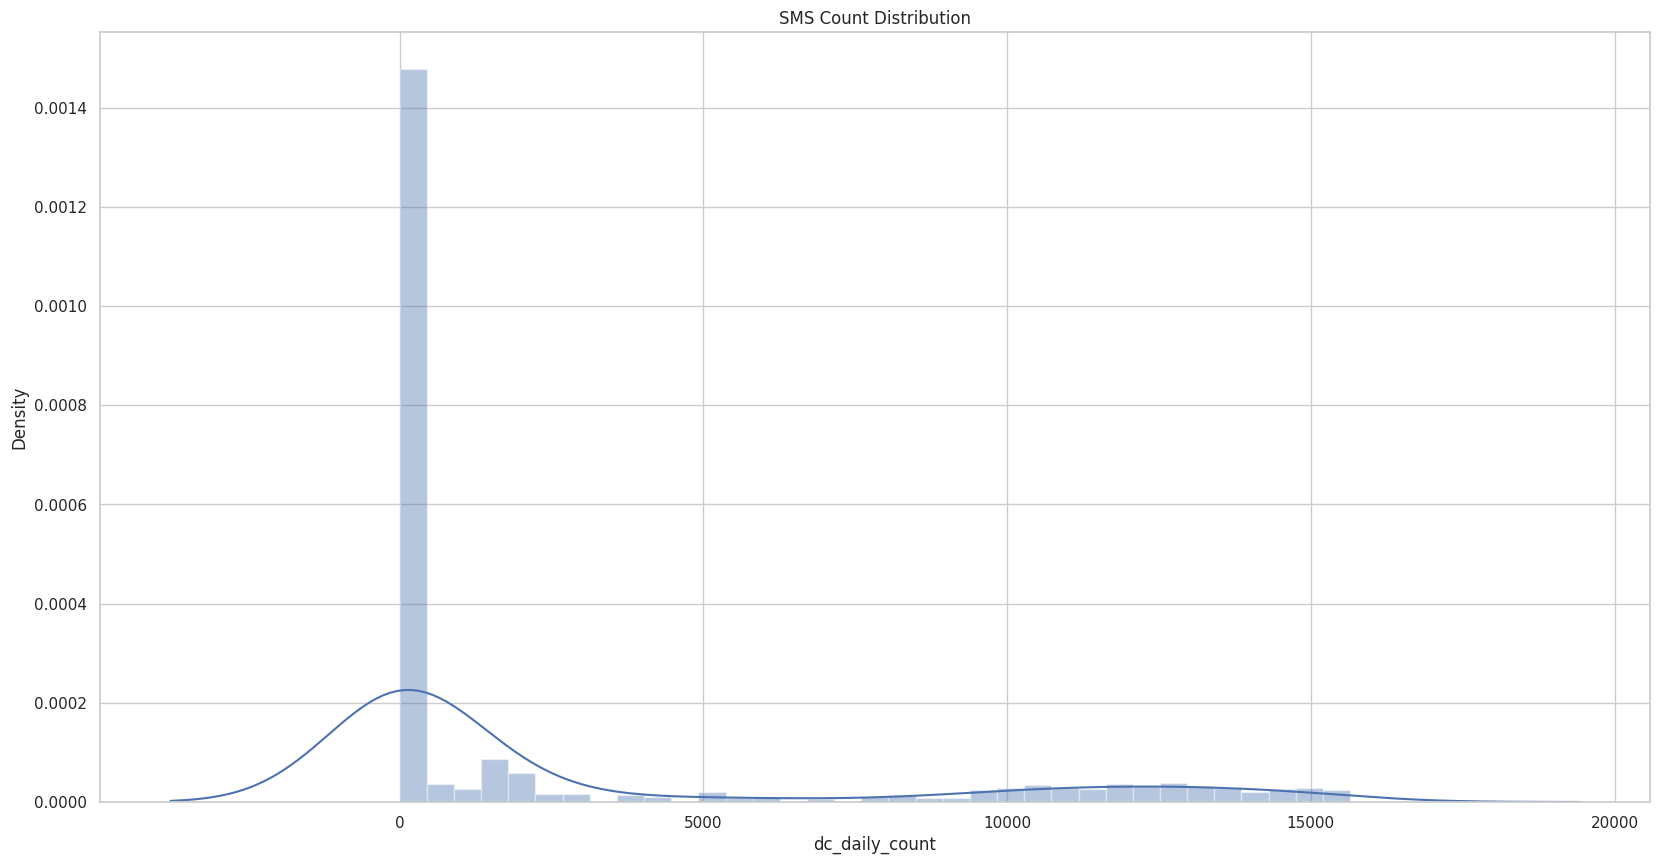

In [59]:
#data distribution plot 
plt.figure(figsize=(20, 10))
sns.distplot(data['dc_daily_count'])
plt.title('SMS Count Distribution')

Text(0.5, 1.0, 'SMS Count Outlier Detection')

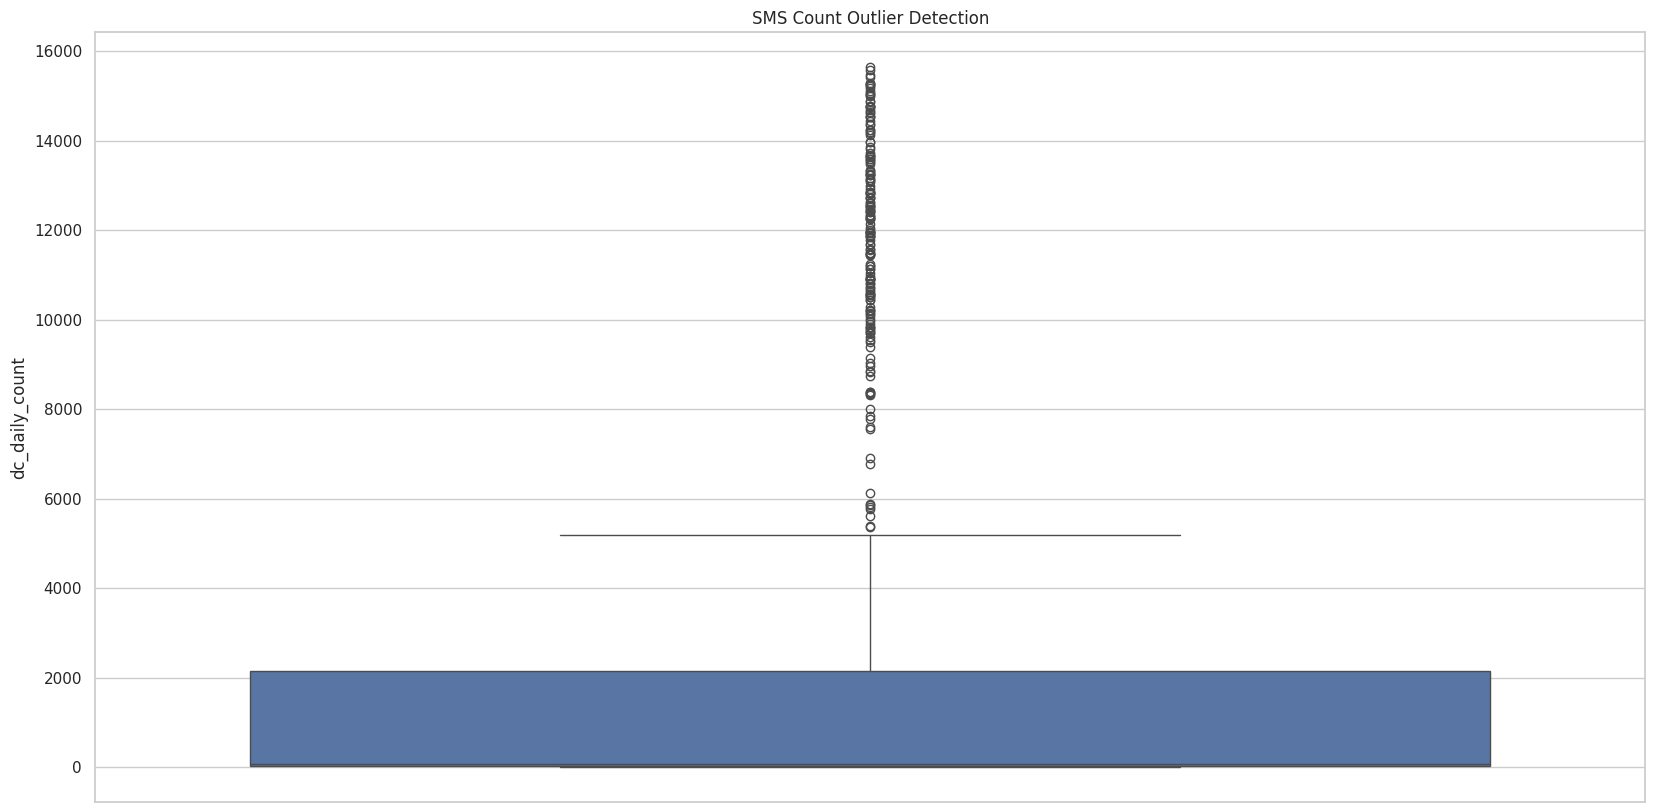

In [60]:
# outlier detection 
plt.figure(figsize=(20, 10))
sns.boxplot(data['dc_daily_count'])
plt.title('SMS Count Outlier Detection')



## Data pre processing 

In [61]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data['dc_daily_count'].quantile(0.25)
Q3 = data['dc_daily_count'].quantile(0.75)

# Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Define the lower and upper bound
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to remove outliers
data = data[(data['dc_daily_count'] >= lower_bound) & (data['dc_daily_count'] <= upper_bound)]

# Display the shape of the new data
print(f'New data shape after removing outliers: {data.shape}')

New data shape after removing outliers: (673, 4)


<Axes: xlabel='dc_date'>

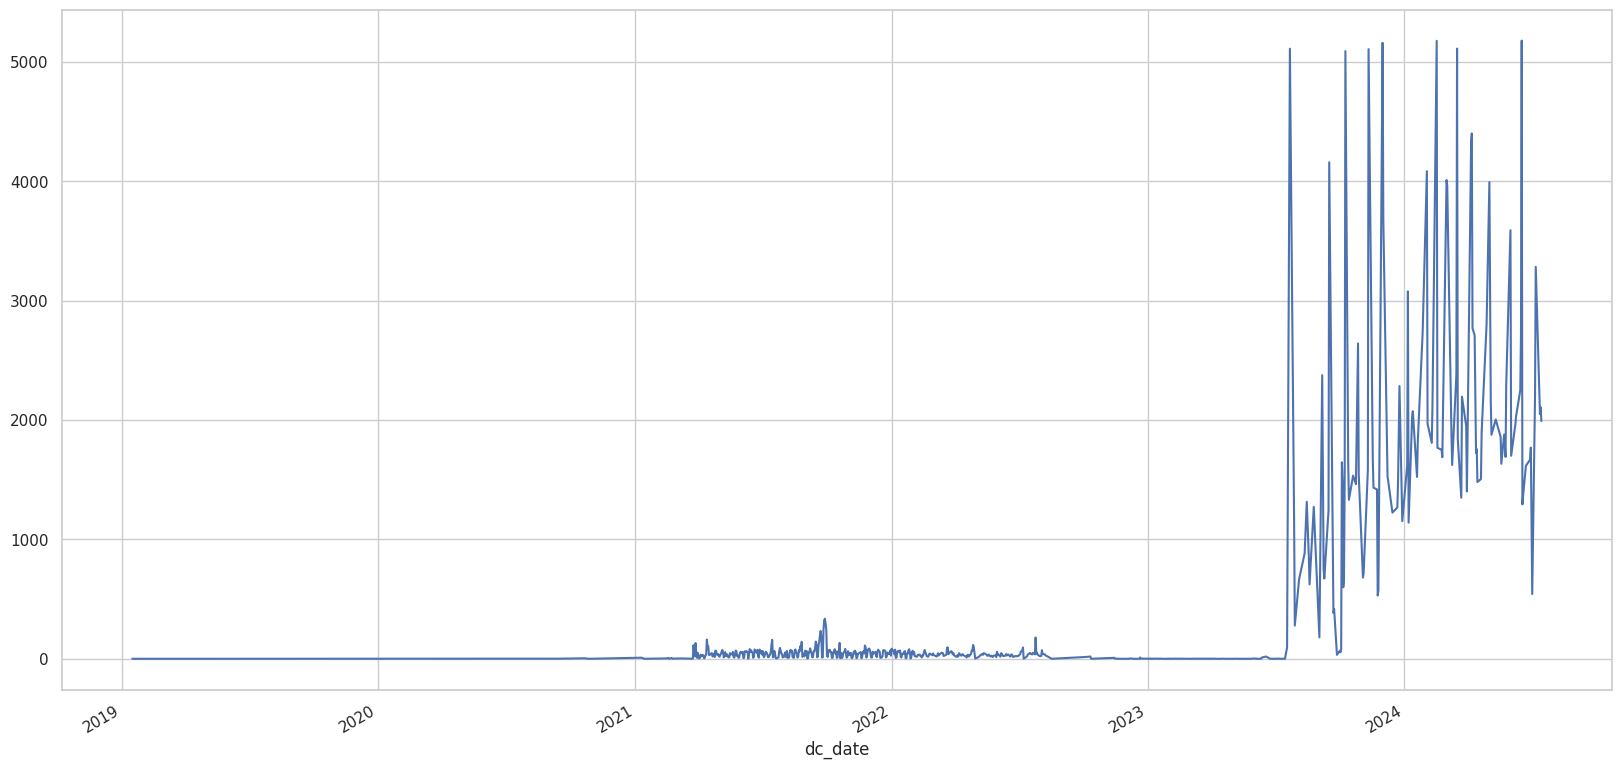

In [62]:
data['dc_daily_count'].plot(kind='line', figsize=(20, 10))

In [63]:
#remove duplicates 
data = data.drop_duplicates()
print(f'New data shape after removing duplicates: {data.shape}')

New data shape after removing duplicates: (640, 4)


In [64]:
data.head()

,dc_daily_count,month,year,day_of_week
dc_date,,,,
2019-01-16,1,1,2019,2
2019-05-02,1,5,2019,3
2020-09-16,2,9,2020,2
2020-10-22,5,10,2020,3
2020-10-25,2,10,2020,6


In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()
# Initialize the MinMaxScaler

def nomalize(data):
    data = data.copy()
    try:

       
        # Fit and transform the weekly_sms_count column
        data['dc_daily_count'] = scaler.fit_transform(data[['dc_daily_count']])
        data['month'] = scaler.fit_transform(data[['month']])
        data['year'] = scaler.fit_transform(data[['year']])
        data['day_of_week'] = scaler.fit_transform(data[['day_of_week']])
        return data
    except Exception as e:
        pass
data = nomalize(data)
# Display the first few rows of the dataframe to verify the normalization
data.head()

,dc_daily_count,month,year,day_of_week
dc_date,,,,
2019-01-16,0.000000,0.000000,0.0,0.333333
2019-05-02,0.000000,0.363636,0.0,0.500000
2020-09-16,0.000193,0.727273,0.2,0.333333
2020-10-22,0.000773,0.818182,0.2,0.500000
2020-10-25,0.000193,0.818182,0.2,1.000000


#### data procesing for time srice 

In [66]:
Dataset = []
target = [] 
for i in range(30, len(data)):
    Dataset.append(data.iloc[i-30:i, 0])
    target.append(data.iloc[i, 0])


Dataset = np.array(Dataset)
target = np.array(target)

print(Dataset.shape)
print(target.shape)


(610, 30)
(610,)


In [67]:
Dataset[1]

array([0.        , 0.00019316, 0.00077265, 0.00019316, 0.        ,
       0.00173846, 0.        , 0.00038632, 0.00057949, 0.00135213,
       0.        , 0.00115897, 0.00019316, 0.00038632, 0.00057949,
       0.00038632, 0.00019316, 0.        , 0.00019316, 0.02182731,
       0.00791964, 0.00367008, 0.02549739, 0.00734016, 0.0015453 ,
       0.0096581 , 0.00347692, 0.00038632, 0.00135213, 0.00656751])

In [68]:
#dataframe 
df = pd.DataFrame()
df['data'] = list(Dataset) 
df['target'] = target 

df.head()

,data,target
0,"[0.0, 0.0, 0.00019316206297083252, 0.000772648...",0.006568
1,"[0.0, 0.00019316206297083252, 0.00077264825188...",0.003863
2,"[0.00019316206297083252, 0.0007726482518833301...",0.005409
3,"[0.0007726482518833301, 0.00019316206297083252...",0.006374
4,"[0.00019316206297083252, 0.0, 0.00173845856673...",0.005022


In [69]:
splie_ratio = 0.9 
split = int(splie_ratio * len(df))
train = df[:split]
test = df[split:]

X_train = Dataset[:split]
y_train = target[:split]
X_test = Dataset[split:]
y_test = target[split:]




## Model traing 


In [70]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

In [ ]:
import os
import sys
import logging
import datetime as dt

today = dt.datetime.today().strftime("%Y-%m-%d")
logging_str = "[%(asctime)s: %(levelname)s: %(module)s: %(message)s]"


dir = r"logs"


log_filepath = os.path.join(dir, f"running_logs_{today}.log")
os.makedirs(dir, exist_ok=True)


logging.basicConfig(
    level=logging.INFO,
    format=logging_str,
    handlers=[logging.FileHandler(log_filepath), logging.StreamHandler(sys.stdout)],
)

logger = logging.getLogger("diffusion_model")

In [71]:
#from Predictoo.logger import logger
model_list = []
r2_list =[]
#logger.info('New Training Session')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)
    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    r2_list.append(model_test_r2)
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- MSE Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    logger.info('-*-'*10)
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- MSE Score: {:.4f}".format(model_test_r2))

   
    logger.info(f'{list(models.keys())[i]}')
    logger.info('Model performance for Training set')
    logger.info(f"- Root Mean Squared Error: {model_train_rmse}")
    logger.info(f"- Mean Absolute Error: {model_train_mae}")
    logger.info(f"- MSE Score: {model_train_r2}")
    logger.info('----------------------------------')
    logger.info('Model performance for Test set')
    logger.info(f"- Test Root Mean Squared Error: {model_test_rmse}")
    logger.info(f"- Test Mean Absolute Error: {model_test_mae}")
    logger.info(f"- Test MSE Score: {model_test_r2}")
    logger.info('\n')
    logger.info('='*35)
    print('='*35)
    print('\n')

[2024-11-17 22:41:17,313: INFO: 4114598752: New Training Session]
Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0730
- Mean Absolute Error: 0.0212
- MSE Score: 0.0053
----------------------------------
[2024-11-17 22:41:17,329: INFO: 4114598752: -*--*--*--*--*--*--*--*--*--*-]
Model performance for Test set
- Root Mean Squared Error: 0.2819
- Mean Absolute Error: 0.2358
- MSE Score: 0.0795
[2024-11-17 22:41:17,333: INFO: 4114598752: Linear Regression]
[2024-11-17 22:41:17,337: INFO: 4114598752: Model performance for Training set]
[2024-11-17 22:41:17,338: INFO: 4114598752: - Root Mean Squared Error: 0.07303424193704422]
[2024-11-17 22:41:17,344: INFO: 4114598752: - Mean Absolute Error: 0.02116579854992047]
[2024-11-17 22:41:17,346: INFO: 4114598752: - MSE Score: 0.005334000495318709]
[2024-11-17 22:41:17,347: INFO: 4114598752: ----------------------------------]
[2024-11-17 22:41:17,348: INFO: 4114598752: Model performance for Test set]
[2024-11-17 2

In [72]:
pred_df = pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'MSE']).sort_values(by=["MSE"],ascending=True)
pred_df

,Model Name,MSE
5,Random Forest Regressor,0.039819
3,K-Neighbors Regressor,0.054288
7,CatBoosting Regressor,0.054946
4,Decision Tree,0.058481
2,Ridge,0.059434
8,AdaBoost Regressor,0.068837
6,XGBRegressor,0.073361
0,Linear Regression,0.079452
1,Lasso,0.210689


## choose the best model 

In [73]:

best_model = pred_df.iloc[0, 0]

print(f'Best Model: {best_model}')

Best Model: Random Forest Regressor


In [85]:

model = models[str(pred_df.iloc[0, 0])]
y_test_pred = model.predict(X_test)



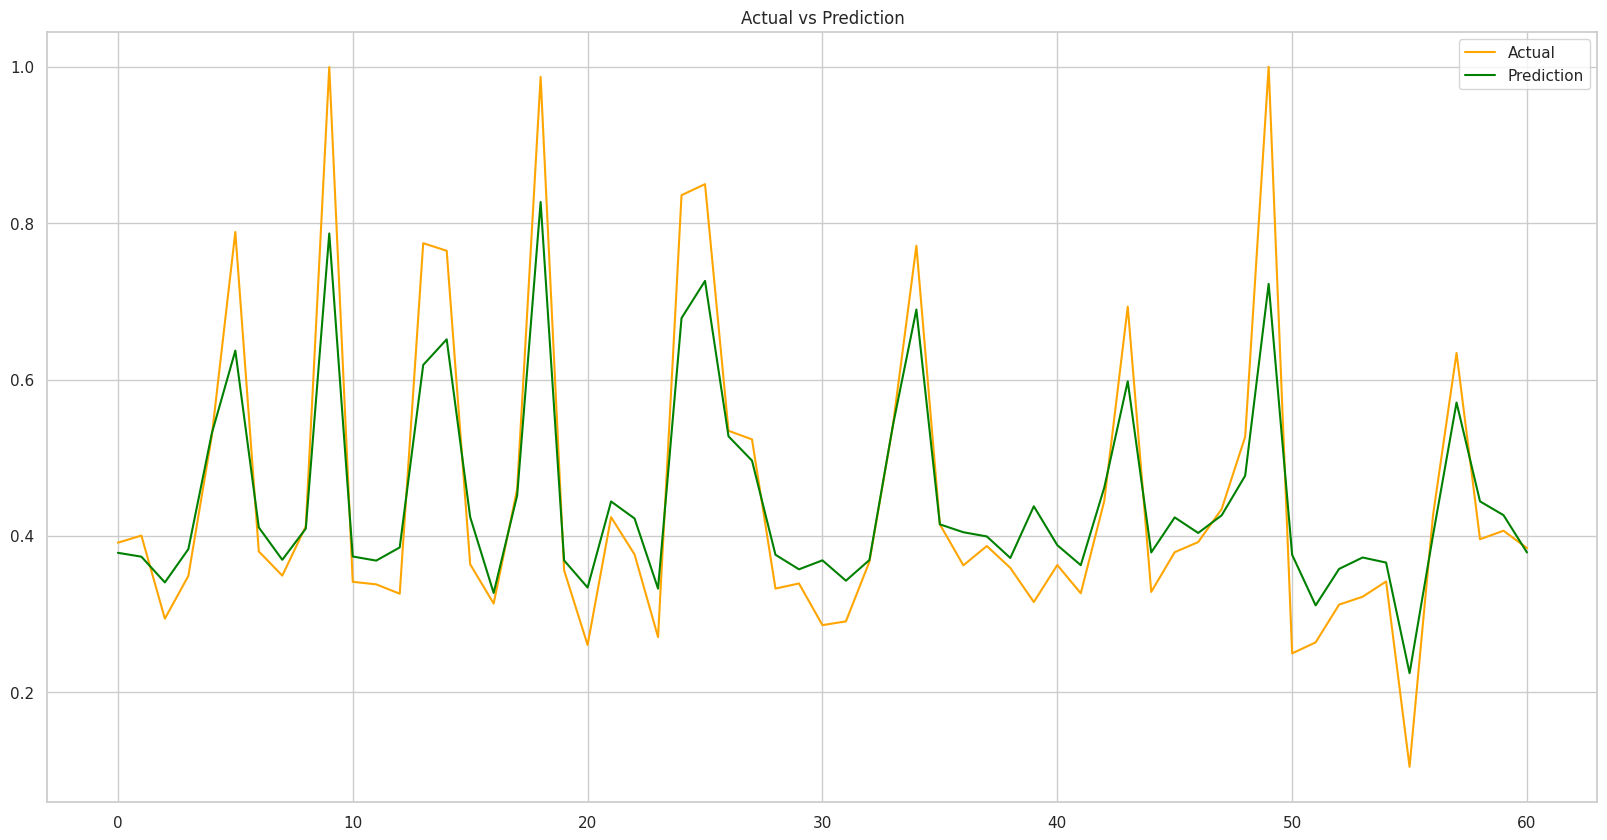

In [86]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual', color='orange')
sns.lineplot(x=range(len(y_test_pred)), y=y_test_pred, label='Prediction', color='green')
plt.title('Actual vs Prediction')
plt.show()


In [76]:
# Train the best model on the entire dataset
full_model = models[best_model]
full_model.fit(Dataset, target)

# Make predictions on the entire dataset
full_predictions = full_model.predict(Dataset)

# Evaluate the model on the entire dataset
full_mae, full_rmse, full_mse = evaluate_model(target, full_predictions)

print(f'Full Model performance:')
print(f"- Mean Absolute Error: {full_mae}")
print(f"- Root Mean Squared Error: {full_rmse}")
print(f"- Mean Squared Error: {full_mse}")

Full Model performance:
- Mean Absolute Error: 0.013012305373388594
- Root Mean Squared Error: 0.03797145442181384
- Mean Squared Error: 0.001441831350907886


In [77]:
X_test

array([[0.12999807, 0.2881978 , 0.98300174, ..., 0.31292254, 0.59435967,
        0.22020475],
       [0.2881978 , 0.98300174, 0.31813792, ..., 0.59435967, 0.22020475,
        0.39134634],
       [0.98300174, 0.31813792, 0.25709871, ..., 0.22020475, 0.39134634,
        0.40042496],
       ...,
       [0.33262507, 0.33919258, 0.28587985, ..., 0.10469384, 0.426695  ,
        0.63395789],
       [0.33919258, 0.28587985, 0.2907089 , ..., 0.426695  , 0.63395789,
        0.39578907],
       [0.28587985, 0.2907089 , 0.36700792, ..., 0.63395789, 0.39578907,
        0.40660614]])

In [78]:
#plot on test data 
test_predictions = full_model.predict(X_test) 



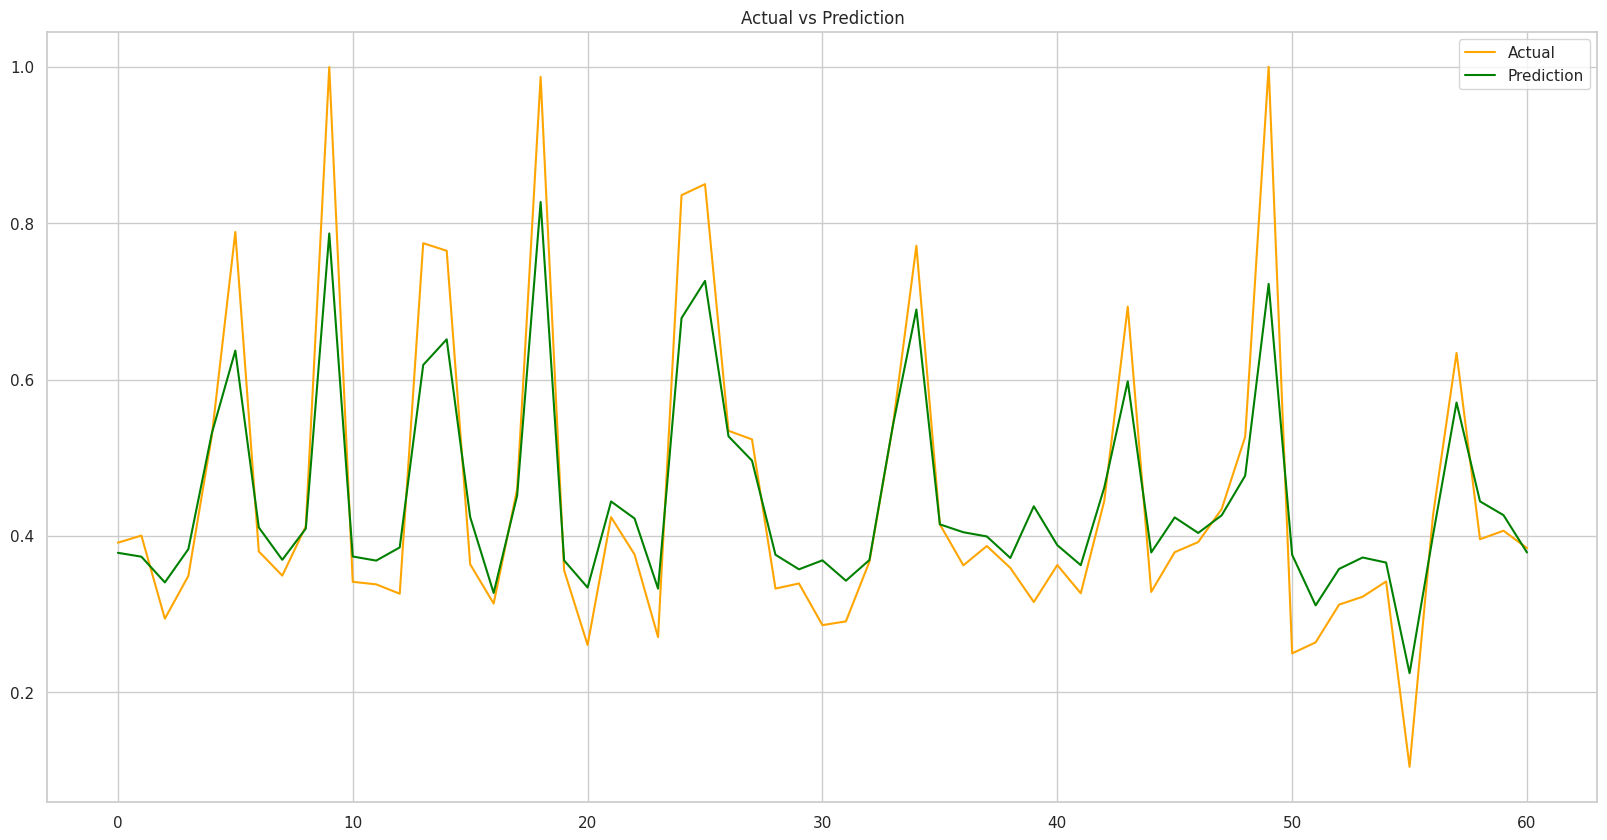

In [79]:
plt.figure(figsize=(20, 10))
sns.lineplot(x=range(len(y_test)), y=y_test, label='Actual', color='orange')
sns.lineplot(x=range(len(test_predictions)), y=test_predictions, label='Prediction', color='green')
plt.title('Actual vs Prediction')
plt.show()



In [80]:
last_pre= test_predictions[-1]
inverse = scaler.inverse_transform([[last_pre]])

In [81]:
inverse[0][0]

2.273011396561717

In [82]:
#predict the future 
start_date = data.index[-1]
future_days = 10 
end_date = '2024-07-20'

df_future=pd.date_range(start=start_date , end= end_date)
df_future = pd.DataFrame(index=df_future)
df_future['dc_daily_count'] = inverse[0][0]
df_future = add_mew_features(df_future)
df_future = nomalize(df_future)

In [83]:
df_future.head()

,dc_daily_count,month,year,day_of_week
2024-07-14,0.0,0.0,0.0,1.000000
2024-07-15,0.0,0.0,0.0,0.000000
2024-07-16,0.0,0.0,0.0,0.166667
2024-07-17,0.0,0.0,0.0,0.333333
2024-07-18,0.0,0.0,0.0,0.500000
